### Import needed packages

In [486]:
import pandas as pd
import numpy as np
import re
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

### Load all the necessary data

In [487]:
#Load the country-ISO code dataset
country = pd.read_excel('../original_data/country.xlsx')

# Load the population by country dataset
pop = pd.read_csv("../original_data/Population.csv")

#Load the climate by country dataset
clim = pd.read_csv("../original_data/Climate.csv")

#Load the currencies by country dataset
curr = pd.read_csv("../original_data/Currencies.csv")

#Load the spoken languages by country dataset
lang = pd.read_csv("../original_data/Languages.csv", encoding='Latin-1')
#Load the religion by country dataset
rel = pd.read_csv("../original_data/Religion.csv")

#Load the peace index dataset
peace = pd.read_csv("../original_data/Peace_Index.csv")

#Load Wef Travel Index data
wef = pd.read_excel('../original_data/WEF_TTDI.xlsx', header=[0, 1], sheet_name='Index Performance')

# Load average restaurant and accomodation cost data
avg_rest_hot_p = pd.read_csv("../original_data/Avg_rest_hot_prices.csv")

# Load LGBTQ dataset
lgbtq = pd.read_excel("../original_data/LGBTQ .xlsx")

#### Get Cuisine Rank data by web scraping

In [488]:
# get data from the link
URL = "https://www.tasteatlas.com/best/cuisines?fbclid=IwAR1CFukbqGEObPMECI1SdpO_dOzeMmBjhGXvRlW8GS63JwpqUAi_0QCl4nU"
page = requests.get(URL)

In [489]:
# attach html parser so that we can have a cleaner look of html format
soup = BeautifulSoup(page.content, "html.parser")

In [490]:
# get the block that contains the ranks
results = soup.find(id="BestCuisines")

In [491]:
# get a list containing the names of the countries in html format
countries = results.find_all("div", class_="top-container")
# get a list containing the ratings of the countries in html format
ratings = results.find_all("div", class_="rating with-title")

In [492]:
# extract text only from the countries html list
country_ls = []
for c in countries:
    country_ls.append(c.find('a', href=True)['href'])
print(country_ls)

['italy', 'greece', 'spain', 'japan', 'india', 'mexico', 'turkiye', 'USA', 'france', 'peru', 'china', 'brazil', 'portugal', 'poland', 'germany', 'indonesia', 'croatia', 'argentina', 'korea', 'vietnam', 'hungary', 'romania', 'philippines', 'iran', 'serbia', 'georgia', 'czech-republic', 'bulgaria', 'england', 'thailand', 'belgium', 'netherlands', 'austria', 'algeria', 'denmark', 'south-africa', 'syria', 'bih', 'malaysia', 'lebanon', 'ukraine', 'palestine', 'bangladesh', 'lithuania', 'taiwan', 'paraguay', 'pakistan', 'tunisia', 'uruguay', 'slovakia', 'egypt', 'singapore', 'afghanistan', 'ecuador', 'ethiopia', 'belarus', 'haiti', 'russia', 'north-macedonia', 'cuba', 'sri-lanka', 'sweden', 'chile', 'jamaica', 'slovenia', 'bolivia', 'venezuela', 'albania', 'northern-ireland', 'nigeria', 'colombia', 'finland', 'ireland', 'cyprus', 'estonia', 'new-zealand', 'guatemala', 'el-salvador', 'trinidad-and-tobago', 'wales', 'israel', 'azerbaijan', 'honduras', 'costa-rica', 'saudi-arabia', 'malta', 'sw

In [493]:
# extract ratings only from the ratings html list
rating_ls = []
for rating in ratings:
    # print(box)
    rating_ls.append(float(rating.find("span").text))
print(rating_ls)

[4.72, 4.69, 4.59, 4.59, 4.54, 4.53, 4.52, 4.51, 4.51, 4.51, 4.49, 4.49, 4.47, 4.44, 4.37, 4.37, 4.33, 4.33, 4.31, 4.31, 4.26, 4.25, 4.25, 4.23, 4.23, 4.23, 4.21, 4.2, 4.18, 4.16, 4.14, 4.1, 4.09, 4.07, 4.05, 4.03, 4.03, 3.99, 3.99, 3.99, 3.98, 3.98, 3.97, 3.96, 3.96, 3.96, 3.95, 3.95, 3.95, 3.94, 3.94, 3.94, 3.94, 3.93, 3.93, 3.93, 3.93, 3.92, 3.92, 3.92, 3.92, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.9, 3.9, 3.9, 3.9, 3.9, 3.89, 3.89, 3.88, 3.88, 3.88, 3.85, 3.85, 3.85, 3.85, 3.85, 3.84, 3.82, 3.82, 3.8, 3.8, 3.8, 3.79, 3.79, 3.69, 3.58]


In [494]:
# check if the country list and rating list length matches
len(rating_ls)==len(country_ls)

True

In [495]:
# Create Data Frame with extracted Data
cuisine_rank = pd.DataFrame({'Country': country_ls, 'Ratings': rating_ls})

## EDA and Data Cleaning, Transforming

#### Country - ISO CODE Dataset

In [496]:
country.head()

,Name,Iso3,Continent,SubContinent
0,Aruba,ABW,Latin America and the Caribbean,Caribbean
1,Andorra,ADO,Europe,Southern Europe
2,Afghanistan,AFG,"South, East and South-Eastern Asia",Southern Asia
3,Angola,AGO,Africa,Middle Africa
4,Albania,ALB,Europe,Southern Europe


In [497]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          328 non-null    object
 1   Iso3          328 non-null    object
 2   Continent     328 non-null    object
 3   SubContinent  328 non-null    object
dtypes: object(4)
memory usage: 10.4+ KB


We can see that there are no null values.

In [498]:
# Check the duplicates by country name
country[country.duplicated(subset=['Name'], keep=False)==True]

,Name,Iso3,Continent,SubContinent
135,Kyrgyzstan,KGZ,Central Asia and the middle east,Central Asia
136,Kyrgyzstan,KGZ,Central Asia and the middle east,Central Asia
185,Macedonia,MKD,Europe,Southern Europe
191,Macedonia,MKD,Europe,Southern Europe
295,United States of America,USA,Northern America,Northern America
297,United States of America,USA,Northern America,Northern America


In [499]:
# Drop three duplicated countries
country.drop_duplicates(subset=['Name'], inplace=True)

In [500]:
# capitalize the first letter and remove any extra spaces
country['Name'] = country['Name'].str.title()
country['Name'] = country['Name'].str.strip()

#### WEF Dataset

In [501]:
wef.head()

Unnamed: 0_level_0 Unnamed: 1_level_0  Unnamed: 2_level_0  \
            ISO Code            Economy              Region   
0                JPN              Japan        Asia-Pacific   
1                USA      United States        The Americas   
2                ESP              Spain  Europe and Eurasia   
3                FRA             France  Europe and Eurasia   
4                DEU            Germany  Europe and Eurasia   

          Unnamed: 3_level_0     Unnamed: 4_level_0  \
                  Sub Region           Income Group   
0       Eastern Asia-Pacific  High-income economies   
1  North and Central America  High-income economies   
2            Southern Europe  High-income economies   
3             Western Europe  High-income economies   
4             Western Europe  High-income economies   

  Travel & Tourism Development Index                                  \
                           2019 Value 2019 Rank 2021 Value 2021 Rank   
0                            5.209308         2   5.245868         1   
1                            5.253746         1   5.199991         2   
2                            5.156125         5   5.154733         3   
3                            5.139553         6   5.126821         4   
4                            5.158769         4   5.064452         5   

               ... Socioeconomic Resilience & Conditions pillar            \
  % Dif Score  ...                                   2021 Value 2021 Rank   
0    0.007018  ...                                     5.710859        11   
1   -0.010232  ...                                     4.496351        44   
2   -0.000270  ...                                     5.297103        25   
3   -0.002477  ...                                     5.734719        10   
4   -0.018283  ...                                     5.884420         8   

                          T&T Demand Pressure & Impact pillar            \
  % Dif Score Rank Change                          2019 Value 2019 Rank   
0    0.035617           6                            4.162195        43   
1    0.018056          -1                            4.835106         4   
2    0.068278           5                            3.668553        89   
3    0.005727           1                            3.447736       106   
4    0.012092           0                            3.691413        87   

                                                
  2021 Value 2021 Rank % Dif Score Rank Change  
0   4.287192        41    0.030031           2  
1   4.945433         3    0.022818           1  
2   3.768780        81    0.027321           8  
3   3.429899       108   -0.005174          -2  
4   3.921128        73    0.062230          14  

[5 rows x 143 columns]

Due to the double header in Excel format, some of the rows are hard to know which index it belongs to.
Therefore, we will transform the dataset to a single header.

In [502]:
# to flatten the double header
wef.columns=wef.columns.to_flat_index()

In [503]:
wef.head()

,"(Unnamed: 0_level_0, ISO Code)","(Unnamed: 1_level_0, Economy)","(Unnamed: 2_level_0, Region)","(Unnamed: 3_level_0, Sub Region)","(Unnamed: 4_level_0, Income Group)","(Travel & Tourism Development Index , 2019 Value)","(Travel & Tourism Development Index , 2019 Rank)","(Travel & Tourism Development Index , 2021 Value)","(Travel & Tourism Development Index , 2021 Rank)","(Travel & Tourism Development Index , % Dif Score)",...,"(Socioeconomic Resilience & Conditions pillar, 2021 Value)","(Socioeconomic Resilience & Conditions pillar, 2021 Rank)","(Socioeconomic Resilience & Conditions pillar, % Dif Score)","(Socioeconomic Resilience & Conditions pillar, Rank Change)","(T&T Demand Pressure & Impact pillar, 2019 Value)","(T&T Demand Pressure & Impact pillar, 2019 Rank)","(T&T Demand Pressure & Impact pillar, 2021 Value)","(T&T Demand Pressure & Impact pillar, 2021 Rank)","(T&T Demand Pressure & Impact pillar, % Dif Score)","(T&T Demand Pressure & Impact pillar, Rank Change)"
0,JPN,Japan,Asia-Pacific,Eastern Asia-Pacific,High-income economies,5.209308,2,5.245868,1,0.007018,...,5.710859,11,0.035617,6,4.162195,43,4.287192,41,0.030031,2
1,USA,United States,The Americas,North and Central America,High-income economies,5.253746,1,5.199991,2,-0.010232,...,4.496351,44,0.018056,-1,4.835106,4,4.945433,3,0.022818,1
2,ESP,Spain,Europe and Eurasia,Southern Europe,High-income economies,5.156125,5,5.154733,3,-0.000270,...,5.297103,25,0.068278,5,3.668553,89,3.768780,81,0.027321,8
3,FRA,France,Europe and Eurasia,Western Europe,High-income economies,5.139553,6,5.126821,4,-0.002477,...,5.734719,10,0.005727,1,3.447736,106,3.429899,108,-0.005174,-2
4,DEU,Germany,Europe and Eurasia,Western Europe,High-income economies,5.158769,4,5.064452,5,-0.018283,...,5.884420,8,0.012092,0,3.691413,87,3.921128,73,0.062230,14


In [504]:
wef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Columns: 143 entries, ('Unnamed: 0_level_0', 'ISO Code') to ('T&T Demand Pressure & Impact pillar', 'Rank Change')
dtypes: float64(69), int64(69), object(5)
memory usage: 130.8+ KB


Among 143 columns we have in dataset, we will choose relevant columns and drop all the others.

In [505]:
# Rename columns
wef.rename(columns = {('Unnamed: 0_level_0', 'ISO Code'):'ISO Code',
                      ('Unnamed: 1_level_0', 'Economy'):'Country',
                      ('Unnamed: 2_level_0', 'Region'):'Continent',
                      ('Unnamed: 3_level_0', 'Sub Region'):'Sub Continent',
                      ('Unnamed: 4_level_0', 'Income Group'):'Income Group'
                      }, inplace = True)

In [506]:
# To check the index of the columns that we wish to drop
for i, col in enumerate(wef.columns):
    print(i, col)

0 ISO Code
1 Country
2 Continent
3 Sub Continent
4 Income Group
5 ('Travel & Tourism Development Index ', '2019 Value')
6 ('Travel & Tourism Development Index ', '2019 Rank')
7 ('Travel & Tourism Development Index ', '2021 Value')
8 ('Travel & Tourism Development Index ', '2021 Rank')
9 ('Travel & Tourism Development Index ', '% Dif Score')
10 ('Travel & Tourism Development Index ', 'Rank Change')
11 ('Enabling Environment subindex', '2019 Value')
12 ('Enabling Environment subindex', '2019 Rank')
13 ('Enabling Environment subindex', '2021 Value')
14 ('Enabling Environment subindex', '2021 Rank')
15 ('Enabling Environment subindex', '% Dif Score')
16 ('Enabling Environment subindex', 'Rank Change')
17 ('Travel and Tourism Policy and Enabling\nConditions subindex', '2019 Value')
18 ('Travel and Tourism Policy and Enabling\nConditions subindex', '2019 Rank')
19 ('Travel and Tourism Policy and Enabling\nConditions subindex', '2021 Value')
20 ('Travel and Tourism Policy and Enabling\nCondit

In [507]:
# subset columns that we want to keep by its index
wef = wef.iloc[:, [0,1,2,3,4,7,8,25,26,49,50,55,56,79,80,85,86,109,110,115,116,127,128]]
wef.columns

Index([                                           'ISO Code',
                                                   'Country',
                                                 'Continent',
                                             'Sub Continent',
                                              'Income Group',
       ('Travel & Tourism Development Index ', '2021 Value'),
        ('Travel & Tourism Development Index ', '2021 Rank'),
                   ('Infrastructure subindex', '2021 Value'),
                    ('Infrastructure subindex', '2021 Rank'),
                ('Safety and Security pillar', '2021 Value'),
                 ('Safety and Security pillar', '2021 Rank'),
                 ('Health and Hygiene pillar', '2021 Value'),
                  ('Health and Hygiene pillar', '2021 Rank'),
             ('International Openness pillar', '2021 Value'),
              ('International Openness pillar', '2021 Rank'),
              ('Price competitiveness pillar', '2021 Value'),
        

In [508]:
# Check null values
wef.isna().sum()

ISO Code                                             0
Country                                              0
Continent                                            0
Sub Continent                                        0
Income Group                                         0
(Travel & Tourism Development Index , 2021 Value)    0
(Travel & Tourism Development Index , 2021 Rank)     0
(Infrastructure subindex, 2021 Value)                0
(Infrastructure subindex, 2021 Rank)                 0
(Safety and Security pillar, 2021 Value)             0
(Safety and Security pillar, 2021 Rank)              0
(Health and Hygiene pillar, 2021 Value)              0
(Health and Hygiene pillar, 2021 Rank)               0
(International Openness pillar, 2021 Value)          0
(International Openness pillar, 2021 Rank)           0
(Price competitiveness pillar, 2021 Value)           0
(Price competitiveness pillar, 2021 Rank)            0
(Natural Resources pillar, 2021 Value)               0
(Natural R

In [509]:
# Check duplicates
wef[wef['Country'].duplicated(keep=False)]

,ISO Code,Country,Continent,Sub Continent,Income Group,"(Travel & Tourism Development Index , 2021 Value)","(Travel & Tourism Development Index , 2021 Rank)","(Infrastructure subindex, 2021 Value)","(Infrastructure subindex, 2021 Rank)","(Safety and Security pillar, 2021 Value)",...,"(International Openness pillar, 2021 Value)","(International Openness pillar, 2021 Rank)","(Price competitiveness pillar, 2021 Value)","(Price competitiveness pillar, 2021 Rank)","(Natural Resources pillar, 2021 Value)","(Natural Resources pillar, 2021 Rank)","(Cultural Resources pillar, 2021 Value)","(Cultural Resources pillar, 2021 Rank)","(Environmental Sustainability pillar, 2021 Value)","(Environmental Sustainability pillar, 2021 Rank)"


We found we have no null data and duplicates in the dataset.

In [510]:
# capitalize the first letter and remove any extra spaces
wef['Country'] = wef['Country'].str.title()
wef['Country'] = wef['Country'].str.strip()

##### Set new columns that classify each index into three categories: Very good, Good, Limited

In [511]:
# Infrastructure subindex
conditions = [(wef[ ('Infrastructure subindex', '2021 Rank')] <= 38), (wef[('Infrastructure subindex', '2021 Rank')] >= 78)]
choices = ["Very good", "Limited"]
wef["Infrastructure subindex, classification"] = np.select(conditions, choices, default = "Good")

In [512]:
# Safety and Security pillar
conditions = [(wef[('Safety and Security pillar', '2021 Rank')] <= 38), (wef[ ('Safety and Security pillar', '2021 Rank')] >= 78)]
choices = ["Very good", "Limited"]
wef["Safety and Security, Classification"] = np.select(conditions, choices, default = "Good")

In [513]:
# Health and Hygiene pillar
conditions = [(wef[('Health and Hygiene pillar', '2021 Rank')] <= 38), (wef[('Health and Hygiene pillar', '2021 Rank')] >= 78)]
choices = ["Very good", "Limited"]
wef["Health and Hygiene, Classification"] = np.select(conditions, choices, default = "Good")

In [514]:
# International Openness pillar
conditions = [(wef[('International Openness pillar', '2021 Rank')] <= 38), (wef[('International Openness pillar', '2021 Rank')] >= 78)]
choices = ["Very good", "Limited"]
wef["International Openess, Classification"] = np.select(conditions, choices, default = "Good")

In [515]:
# Price competitiveness pillar
conditions = [(wef[('Price competitiveness pillar', '2021 Rank')] <= 38), (wef[ ('Price competitiveness pillar', '2021 Rank')] >= 78)]
choices = ["Very good", "Limited"]
wef["Price competitiveness, Classification"] = np.select(conditions, choices, default = "Good")

In [516]:
# Natural Resources pillar
conditions = [(wef[('Natural Resources pillar', '2021 Rank')] <= 38), (wef[('Natural Resources pillar', '2021 Rank')] >= 78)]
choices = ["Very good", "Limited"]
wef["Natural Resources, Classification"] = np.select(conditions, choices, default = "Good")

In [517]:
# Cultural Resources pillar
conditions = [(wef[('Cultural Resources pillar', '2021 Rank')] <= 38), (wef[('Cultural Resources pillar', '2021 Rank')] >= 78)]
choices = ["Very good", "Limited"]
wef["Cultural Resources, Classification"] = np.select(conditions, choices, default = "Good")

In [518]:
# Environmental Sustainability pillar
conditions = [(wef[('Environmental Sustainability pillar', '2021 Rank')] <= 38), (wef[('Environmental Sustainability pillar', '2021 Rank')] >= 78)]
choices = ["Very good", "Limited"]
wef["Environmental Sustainability, Classification"] = np.select(conditions, choices, default = "Good")

#### Population dataset

In [519]:
pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898870.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33933611.0


In [520]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

In [521]:
# Check null values
pop.isna().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              2
                 ..
2017              2
2018              2
2019              2
2020              2
2021              2
Length: 66, dtype: int64

In [522]:
# check null values in 2021, the relevant year for our analysis.
pop[pop[["2021"]].isnull().any(axis=1)]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
69,Eritrea,ERI,"Population, total",SP.POP.TOTL,1007586.0,1033320.0,1060489.0,1088859.0,1118152.0,1148188.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,Not classified,INX,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [523]:
pop[pop.duplicated(subset=['Country Name'])==True]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021


Given the exploration done in the pop dataset, we can conclude that for the next step in the cleaning and transformations, we wish to keep only the "Country Name", " Country Code", and the most recent year 2021 (which we will rename to pop_2021). Moreover, to make sure that the dataset is homogeneous we will capitalize the first letter of each word in the "Country Name" column. We can also see that there is two null values in 2021, which will be handled.

In [524]:
# Select the columns we are interest in
pop = pop[["Country Name", "Country Code", "2021"]]

In [525]:
# Rename the columns
pop = pop.rename(columns = {"2021": "Pop_2021", "Country Name": "Country"})

In [526]:
# Capitalise the first letter of each word in the Country column, and remove any extra spaces
pop["Country"] = pop["Country"].str.title()
pop["Country"] = pop["Country"].str.strip()

In [527]:
# Remove empty rows
pop = pop.dropna()

#### Climate dataset

In [528]:
clim.head()

,COUNTRY,DESCRIPTION
0,Afghanistan,arid to semiarid; cold winters and hot summers
1,Akrotiri,"temperate; Mediterranean with hot, dry summers..."
2,Albania,"mild temperate; cool, cloudy, wet winters; hot..."
3,Algeria,"arid to semiarid; mild, wet winters with hot, ..."
4,American Samoa,"tropical marine, moderated by southeast trade ..."


In [529]:
clim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   COUNTRY      277 non-null    object
 1   DESCRIPTION  277 non-null    object
dtypes: object(2)
memory usage: 4.5+ KB


In [530]:
# check null values
clim.isna().sum()

COUNTRY        0
DESCRIPTION    0
dtype: int64

In [531]:
# check duplicates
clim[clim.duplicated(subset=['COUNTRY'], keep=False)==True]

,COUNTRY,DESCRIPTION


Given the exploration done in the clim dataset, we can conclude that for the next step in the cleaning and transformations, we wish to keep all the columns, but rename them. Moreover, to make sure that the dataset is homogeneous we will capitalize the first letter of each word in the "COUNTRY" and "DESCRIPTION" column. We can also see that there is no null values, hence no handling of missing values is needed in this case.

In [532]:
# Rename the columns
clim = clim.rename(columns = {"COUNTRY": "Country", "DESCRIPTION": "Climate"})

In [533]:
# Capitalise the first letter of each word in the Country and Climate column, and remove any extra spaces in the Country column
clim["Country"] = clim["Country"].str.title()
clim["Country"] = clim["Country"].str.strip()
clim["Climate"] = clim["Climate"].str.title()

In [534]:
# Set a new column that classifies climates 
conditions = [(clim["Climate"].str.contains("Tropical|Arid|Semiarid|Desert")),
              (clim["Climate"].str.contains("Temperate|Continental|Hot Summers|Cold Winters|Warm Summers|Maritime" )),
              (clim["Climate"].str.contains("Mediterranean|Subtropical")),
              (clim["Climate"].str.contains("Highland")), 
              (clim["Climate"].str.contains("Polar|Antarctic|Arctic")),
              (clim["Climate"].str.contains("Equatorial"))]

choices = ["Tropical", "Temperate", "Subtropical", "Highland", "Polar", "Equatorial" ]
clim["Climate Zone"] = np.select(conditions, choices, default=None)

In [535]:
# check rows that were not categorized into the climate zone
clim[clim['Climate Zone'].isnull()]

,Country,Climate,Climate Zone
81,Falkland Islands (Islas Malvinas),"Cold Marine; Strong Westerly Winds, Cloudy, Hu...",None
82,Faroe Islands,"Mild Winters, Cool Summers; Usually Overcast; ...",None
104,Guinea,Generally Hot And Humid; Monsoonal-Type Rainy ...,None
211,Saint Martin,Temperature Averages 80-85 Degrees All Year Lo...,None
212,Saint Pierre And Miquelon,"Cold And Wet, With Considerable Mist And Fog; ...",None
229,South Georgia And The South Sandwich Islands,"Variable, With Mostly Westerly Winds Throughou...",None


We will ignore the above countries that were not classified, since these are not the countries that we are interested (not presented in the WEF dataset).

#### Currency dataset

In [536]:
curr.head()

,Entity,Currency,AlphabeticCode,NumericCode,MinorUnit,WithdrawalDate
0,AFGHANISTAN,Afghani,AFN,971.0,2,NaN
1,ÅLAND ISLANDS,Euro,EUR,978.0,2,NaN
2,ALBANIA,Lek,ALL,8.0,2,NaN
3,ALGERIA,Algerian Dinar,DZD,12.0,2,NaN
4,AMERICAN SAMOA,US Dollar,USD,840.0,2,NaN


In [537]:
curr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Entity          441 non-null    object 
 1   Currency        441 non-null    object 
 2   AlphabeticCode  438 non-null    object 
 3   NumericCode     435 non-null    float64
 4   MinorUnit       276 non-null    object 
 5   WithdrawalDate  162 non-null    object 
dtypes: float64(1), object(5)
memory usage: 20.8+ KB


In [538]:
# check null values
curr.isna().sum()

Entity              0
Currency            0
AlphabeticCode      3
NumericCode         6
MinorUnit         165
WithdrawalDate    279
dtype: int64

In [539]:
# check three null values in Alphabetic Code
curr[curr[["AlphabeticCode"]].isnull().any(axis=1)]

,Entity,Currency,AlphabeticCode,NumericCode,MinorUnit,WithdrawalDate
8,ANTARCTICA,No universal currency,NaN,NaN,NaN,NaN
183,"PALESTINE, STATE OF",No universal currency,NaN,NaN,NaN,NaN
222,SOUTH GEORGIA AND THE SOUTH SANDWICH ISLANDS,No universal currency,NaN,NaN,NaN,NaN


In [540]:
# check historic currencies that withdrawal date is not null
curr[curr[["WithdrawalDate"]].notnull().any(axis=1)]

,Entity,Currency,AlphabeticCode,NumericCode,MinorUnit,WithdrawalDate
279,AFGHANISTAN,Afghani,AFA,4.0,NaN,2003-01
280,ÅLAND ISLANDS,Markka,FIM,246.0,NaN,2002-03
281,ALBANIA,Old Lek,ALK,8.0,NaN,1989-12
282,ANDORRA,Andorran Peseta,ADP,20.0,NaN,2003-07
283,ANDORRA,Spanish Peseta,ESP,724.0,NaN,2002-03
...,...,...,...,...,...,...
436,ZIMBABWE,Zimbabwe Dollar (new),ZWN,942.0,NaN,2006-09
437,ZIMBABWE,Zimbabwe Dollar,ZWR,935.0,NaN,2009-06
438,ZZ01_Gold-Franc,Gold-Franc,XFO,NaN,NaN,2006-10
439,ZZ02_RINET Funds Code,RINET Funds Code,XRE,NaN,NaN,1999-11


Given the exploration done in the curr dataset, we can conclude that for the next step in the cleaning and transformations, we wish to keep only the "Entity", "Currency", and "AlphabeticCode" columns, but rename them. Moreover, to make sure that the dataset is homogeneous we will capitalize the first letter of each word in the "Entity" and "Currency" column. We can also see that there is three null values in the "AlphabeticCode" column, which will be handled. In addition, there are a number of currencies which are no longer used, we will them subset this dataset to only contain currently accepted currencies.

In [541]:
# Drop rows with Null values in Alphabetic Code as those are not officially recognized countries
curr.dropna(subset=['AlphabeticCode'], inplace=True)

In [542]:
# Keep only the rows without a withdrawal date
curr = curr[curr[["WithdrawalDate"]].isnull().any(axis=1)]

In [543]:
# check duplicated countries
curr[curr.duplicated(subset=['Entity'], keep=False)==True]

,Entity,Currency,AlphabeticCode,NumericCode,MinorUnit,WithdrawalDate
25,BHUTAN,Indian Rupee,INR,356.0,2,NaN
26,BHUTAN,Ngultrum,BTN,64.0,2,NaN
27,BOLIVIA (PLURINATIONAL STATE OF),Boliviano,BOB,68.0,2,NaN
28,BOLIVIA (PLURINATIONAL STATE OF),Mvdol,BOV,984.0,2,NaN
46,CHILE,Chilean Peso,CLP,152.0,0,NaN
47,CHILE,Unidad de Fomento,CLF,990.0,4,NaN
51,COLOMBIA,Colombian Peso,COP,170.0,2,NaN
52,COLOMBIA,Unidad de Valor Real,COU,970.0,2,NaN
60,CUBA,Cuban Peso,CUP,192.0,2,NaN
61,CUBA,Peso Convertible,CUC,931.0,2,NaN


In [544]:
# drop duplicates by dropping the wrong currency with index
curr = curr.drop(index=[25, 28, 47, 52, 60, 72, 103, 135, 156, 167, 185, 231, 232, 254, 256, 257])
# check if duplicates were dropped well
curr[curr.duplicated(subset=['Entity'], keep=False)==True]

,Entity,Currency,AlphabeticCode,NumericCode,MinorUnit,WithdrawalDate


In [545]:
# Select the columns to keep
curr = curr[["Entity", "Currency", "AlphabeticCode"]]

In [546]:
# Rename the columns
curr = curr.rename(columns = {"Entity": "Country", "AlphabeticCode": "Currency Code"})

In [547]:
# Capitalise the first letter of each word in the Country and Currency columns,
# and remove any extra spaces in the country column. Remove any text after "(" in the country column.
curr["Country"] = curr["Country"].str.title()
curr["Country"] = curr['Country'].str.partition("(")[0]
curr["Country"] = curr["Country"].str.strip()
curr["Currency"] = curr["Currency"].str.title()

#### Language dataset

In [548]:
lang.head(50)

,Country,Languages Spoken
0,Afghanistan,"Dari Persian, Pashtu (both official), other Tu..."
1,Albania,"Albanian (Tosk is the official dialect), Greek"
2,Algeria,"Arabic (official), French, Berber dialects"
3,Andorra,"CatalÃ¡n (official), French, Castilian, Portug..."
4,Angola,"Portuguese (official), Bantu and other African..."
5,Antigua and Barbuda,"English (official), local dialects"
6,Argentina,"Spanish (official), English, Italian, German, ..."
7,Armenia,"Armenian 98%, Yezidi, Russian"
8,Australia,"English 79%, native and other languages"
9,Austria,"German (official nationwide); Slovene, Croatia..."


In [549]:
lang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           198 non-null    object
 1   Languages Spoken  198 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [550]:
# check null values
lang.isna().sum()

Country             0
Languages Spoken    0
dtype: int64

In [551]:
# check duplicates
lang[lang['Country'].duplicated(keep=False)==True]

,Country,Languages Spoken


Given the exploration done in the lang dataset, we can conclude that for the next step in the cleaning and transformations, we wish to keep all the columns, but rename them. Moreover, to make sure that the dataset is homogeneous we will capitalize the first letter of each word in the "Country" and "Language Spoken" column. We can also see that there is no null values, hence no handling of missing values is needed in this case. In addition, we can see that the languages spoken includes more than the official languages, in the cleaning we will strive to only keep the official languages.

In [552]:
# Rename the columns
lang = lang.rename(columns = {"Languages Spoken": "Official Language"})

In [553]:
def language_cleaning(lan: str):
    """ This function is to clean the official languages, the rule is
    - If the official contains '(official)' in the text, adopt languages that come before '(official)
    - Otherwise take only first language"""

    # replace 'and' to comma
    # delete numbers and percentage
    lan = lan.title()
    lan = lan.replace(' And ', ', ')
    lan = re.sub("(\s[\d.]+%)", "", lan)

    # first if the text contains 'official', we are going to keep all the official
    if 'Official' in lan:
        lan = lan.partition("(")[0].strip()

    # otherwise, we are going to keep first one as a main language spoken
    else:
        lan = lan.partition(",")[0].strip()
    return lan

In [554]:
# apply language cleaning function to the 'languages Spoken' column
lang['Official Language'] = lang['Official Language'].apply(language_cleaning)

In [555]:
# Capitalise the first letter of each word in the Country and Official Language columns
lang["Country"] = lang["Country"].str.title()
lang["Country"] = lang["Country"].str.strip()

#### Religion dataset

In [556]:
rel.head()

,Country or Area,Year,Area,Sex,Religion,Record Type,Reliability,Source Year,Value,Value Footnotes
0,Albania,2011,Total,Both Sexes,Total,Census - de jure - complete tabulation,"Final figure, complete",2013.0,2800138.0,NaN
1,Albania,2011,Total,Both Sexes,Atheist,Census - de jure - complete tabulation,"Final figure, complete",2013.0,69995.0,NaN
2,Albania,2011,Total,Both Sexes,Catholic,Census - de jure - complete tabulation,"Final figure, complete",2013.0,280921.0,NaN
3,Albania,2011,Total,Both Sexes,Evangelical,Census - de jure - complete tabulation,"Final figure, complete",2013.0,3797.0,NaN
4,Albania,2011,Total,Both Sexes,Muslim,Census - de jure - complete tabulation,"Final figure, complete",2013.0,1587608.0,NaN


In [557]:
rel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3416 entries, 0 to 3415
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  3416 non-null   object 
 1   Year             3416 non-null   object 
 2   Area             3333 non-null   object 
 3   Sex              3332 non-null   object 
 4   Religion         3332 non-null   object 
 5   Record Type      3332 non-null   object 
 6   Reliability      3332 non-null   object 
 7   Source Year      3332 non-null   float64
 8   Value            3332 non-null   float64
 9   Value Footnotes  1505 non-null   object 
dtypes: float64(2), object(8)
memory usage: 267.0+ KB


In [558]:
# check null values
rel.isna().sum()

Country or Area       0
Year                  0
Area                 83
Sex                  84
Religion             84
Record Type          84
Reliability          84
Source Year          84
Value                84
Value Footnotes    1911
dtype: int64

In [559]:
# check null values in religion columns
rel[rel[["Religion"]].isnull().any(axis=1)]

,Country or Area,Year,Area,Sex,Religion,Record Type,Reliability,Source Year,Value,Value Footnotes
3332,footnoteSeqID,Footnote,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3333,1,"Because of rounding, totals are not in all cas...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3334,2,These data have been randomly rounded to prote...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3335,3,"Including population in off-shore, migratory a...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3336,4,"Category 'No religion' includes Agnoticism, At...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3411,79,Data of mini-census taken in 2017.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3412,80,Data refer to resident population.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3413,81,Excluding population enumerated in hotels.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3414,82,"Other includes Orthodox, Bahai, Other Christia...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Given the exploration done in the rel dataset, we can conclude that for the next step in the cleaning and transformations, we wish to keep the "Country or Area" and "Religion" columns but rename them. Moreover, to make sure that the dataset is homogeneous we will capitalize the first letter of each word in the "Country or Area" column. We can also see that there is multiple null values, that arise due to the existing footnotes at the end of the document, which will be dealt with. In addition, we can see that for each country there is the listing of all the religions present in the country. As we only wish to keep the main one the others will be removed.

In [560]:
# Remove the footnote rows, which is where the Religion column
rel.dropna(subset=['Religion'], inplace=True)

In [561]:
# Keep the data from the most recent year for each country
# first sort by country and year
rel = rel.sort_values(by=["Country or Area", "Year"])
# then drop all duplicates keeping the data from the latest year
rel = rel.drop_duplicates(subset=['Country or Area', "Religion"], keep='last')

In [562]:
# check duplicates of countries
rel[rel['Country or Area'].duplicated(keep=False)==True]

,Country or Area,Year,Area,Sex,Religion,Record Type,Reliability,Source Year,Value,Value Footnotes
0,Albania,2011,Total,Both Sexes,Total,Census - de jure - complete tabulation,"Final figure, complete",2013.0,2800138.0,NaN
1,Albania,2011,Total,Both Sexes,Atheist,Census - de jure - complete tabulation,"Final figure, complete",2013.0,69995.0,NaN
2,Albania,2011,Total,Both Sexes,Catholic,Census - de jure - complete tabulation,"Final figure, complete",2013.0,280921.0,NaN
3,Albania,2011,Total,Both Sexes,Evangelical,Census - de jure - complete tabulation,"Final figure, complete",2013.0,3797.0,NaN
4,Albania,2011,Total,Both Sexes,Muslim,Census - de jure - complete tabulation,"Final figure, complete",2013.0,1587608.0,NaN
...,...,...,...,...,...,...,...,...,...,...
3327,Zambia,2010,Total,Both Sexes,Hindu,Census - de facto - complete tabulation,"Final figure, complete",2015.0,4383.0,NaN
3328,Zambia,2010,Total,Both Sexes,Muslim,Census - de facto - complete tabulation,"Final figure, complete",2015.0,61412.0,NaN
3329,Zambia,2010,Total,Both Sexes,Protestant,Census - de facto - complete tabulation,"Final figure, complete",2015.0,9436231.0,NaN
3330,Zambia,2010,Total,Both Sexes,Other,Census - de facto - complete tabulation,"Final figure, complete",2015.0,253621.0,NaN


In [563]:
# we want to keep the most common religion per country

# First, Remove the rows with the total number of religious people.
# Also remove the other, not stated, and refused to answer religions
rel = rel[rel["Religion"].str.contains("Total|Other|Not Stated|Refused to answer|Unknown|None") == False]

# Keep the rows with the highest value, meaning the main religion of each country
rel = rel.sort_values(by=["Country or Area", "Value"])
rel = rel.drop_duplicates(subset=['Country or Area'], keep='last')

In [564]:
# Select the columns to keep
rel = rel[["Country or Area", "Religion"]]

In [565]:
# Rename the columns
rel = rel.rename(columns = {"Country or Area": "Country", "Religion": "Main Religion"})

In [566]:
# Capitalise the first letter of each word in the Country and religion, and remove any extra spaces in the country column.
rel["Country"] = rel["Country"].str.title()
rel["Country"] = rel["Country"].str.strip()
rel["Main Religion"] = rel["Main Religion"].str.title()

#### Peace index dataset

In [567]:
peace.head()

,RANK,COUNTRY,SCORE
0,1.0,Iceland,1.100
1,2.0,New Zealand,1.253
2,3.0,Denmark,1.256
3,4.0,Portugal,1.267
4,5.0,Slovenia,1.315


In [568]:
peace.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RANK     163 non-null    float64
 1   COUNTRY  163 non-null    object 
 2   SCORE    163 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.3+ KB


In [569]:
# check null values
peace.isna().sum()

RANK       14
COUNTRY    14
SCORE      14
dtype: int64

In [570]:
# check rows with null values
peace[peace[["COUNTRY"]].isnull().any(axis=1)]

,RANK,COUNTRY,SCORE
16,NaN,NaN,NaN
45,NaN,NaN,NaN
74,NaN,NaN,NaN
86,NaN,NaN,NaN
95,NaN,NaN,NaN
108,NaN,NaN,NaN
125,NaN,NaN,NaN
128,NaN,NaN,NaN
138,NaN,NaN,NaN
155,NaN,NaN,NaN


In [571]:
# check duplicates
peace[peace['COUNTRY'].duplicated(keep=False)]

,RANK,COUNTRY,SCORE
16,NaN,NaN,NaN
45,NaN,NaN,NaN
74,NaN,NaN,NaN
86,NaN,NaN,NaN
95,NaN,NaN,NaN
108,NaN,NaN,NaN
125,NaN,NaN,NaN
128,NaN,NaN,NaN
138,NaN,NaN,NaN
155,NaN,NaN,NaN


Given the exploration done in the peace dataset, we can conclude that for the next step in the cleaning and transformations, we wish to keep the "RANK", and "COUNTRY" columns, but rename them. Moreover, to make sure that the dataset is homogeneous we will capitalize the first letter of each word in the "COUNTRY" column. We can also see that there is multiple null values, that arise due to the existing of completely empty rows, which will be dealt with.

In [572]:
# Select the columns to keep
peace = peace[["RANK", "COUNTRY"]]

In [573]:
# Rename the columns
peace = peace.rename(columns = {"RANK": "Rank", "COUNTRY": "Country"})

In [574]:
# Capitalise the first letter of each word in the Country column
peace["Country"] = peace["Country"].str.title()
peace["Country"] = peace["Country"].str.strip()

In [575]:
# Drop null rows
peace = peace.dropna()

In [576]:
# change type of rank to integer
peace['Rank']=peace.Rank.astype(int)

#### Average Restaurant and Accomodation Cost Dataset

In [577]:
avg_rest_hot_p.head()

,Country Name,Country Code,Classification Name,Classification Code,Series Name,Series Code,2017 [YR2017]
0,Albania,ALB,Price level index (World = 100),PX.WL,1111000:RESTAURANTS AND HOTELS,1111000.0,50.78426859
1,Algeria,DZA,Price level index (World = 100),PX.WL,1111000:RESTAURANTS AND HOTELS,1111000.0,33.93366644
2,American Samoa,ASM,Price level index (World = 100),PX.WL,1111000:RESTAURANTS AND HOTELS,1111000.0,..
3,Angola,AGO,Price level index (World = 100),PX.WL,1111000:RESTAURANTS AND HOTELS,1111000.0,79.22385228
4,Anguilla,AIA,Price level index (World = 100),PX.WL,1111000:RESTAURANTS AND HOTELS,1111000.0,122.29901


In [578]:
avg_rest_hot_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country Name         224 non-null    object 
 1   Country Code         222 non-null    object 
 2   Classification Name  222 non-null    object 
 3   Classification Code  222 non-null    object 
 4   Series Name          222 non-null    object 
 5   Series Code          222 non-null    float64
 6   2017 [YR2017]        222 non-null    object 
dtypes: float64(1), object(6)
memory usage: 12.5+ KB


In [579]:
# check null values
avg_rest_hot_p.isna().sum()

Country Name           3
Country Code           5
Classification Name    5
Classification Code    5
Series Name            5
Series Code            5
2017 [YR2017]          5
dtype: int64

In [580]:
# check null values in Country Code
avg_rest_hot_p[avg_rest_hot_p[["Country Code"]].isnull().any(axis=1)]

,Country Name,Country Code,Classification Name,Classification Code,Series Name,Series Code,2017 [YR2017]
222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,Data from database: ICP 2017,NaN,NaN,NaN,NaN,NaN,NaN
226,Last Updated: 10/21/2020,NaN,NaN,NaN,NaN,NaN,NaN


In [581]:
# check duplicates in country name
avg_rest_hot_p[avg_rest_hot_p['Country Name'].duplicated(keep=False)==True]

,Country Name,Country Code,Classification Name,Classification Code,Series Name,Series Code,2017 [YR2017]
222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Given the exploration done in the avg_rest_hot_p dataset, we can conclude that for the next step in the cleaning and transformations, we wish to keep only the "Country Name", " Country Code", and the "2017 [YR2017]" columns, but we will rename them. Moreover, to make sure that the dataset is homogeneous we will capitalize the first letter of each word in the "Country Name" column. We can also see that there is 5 null values, which arise due to empty rows and footnotes, these will be handled accordingly. Additionally, we can see that some countries in the average price have ".." instead of being null, which will be solved.

In [582]:
# Select the columns we are interest in
avg_rest_hot_p = avg_rest_hot_p[["Country Name", "Country Code", "2017 [YR2017]"]]

In [583]:
# Rename the columns
avg_rest_hot_p = avg_rest_hot_p.rename(columns = {"Country Name": "Country", "2017 [YR2017]": "Average Hotel and Restaurant Cost"})

In [584]:
# Capitalise the first letter of each word in the Country column, and remove any extra spaces
avg_rest_hot_p["Country"] = avg_rest_hot_p["Country"].str.title()
avg_rest_hot_p["Country"] = avg_rest_hot_p["Country"].str.strip()

In [585]:
# Substitute ".." for null value
avg_rest_hot_p["Average Hotel and Restaurant Cost"] = avg_rest_hot_p["Average Hotel and Restaurant Cost"].replace("..",None)

# Remove empty rows
avg_rest_hot_p = avg_rest_hot_p.dropna(subset=['Average Hotel and Restaurant Cost'])

In [586]:
# Convert the column from string to numeric value
avg_rest_hot_p["Average Hotel and Restaurant Cost"] = pd.to_numeric(avg_rest_hot_p["Average Hotel and Restaurant Cost"], errors = "coerce")

In [587]:
# Round the numbers to two decimal points
avg_rest_hot_p["Average Hotel and Restaurant Cost"] = avg_rest_hot_p["Average Hotel and Restaurant Cost"].round(2)

In [588]:
# check out summary of the average cost
avg_rest_hot_p.describe()

,Average Hotel and Restaurant Cost
count,184.000000
mean,82.796087
std,41.254402
min,26.440000
25%,53.867500
50%,69.090000
75%,103.875000
max,232.370000


<Figure size 1000x500 with 0 Axes>

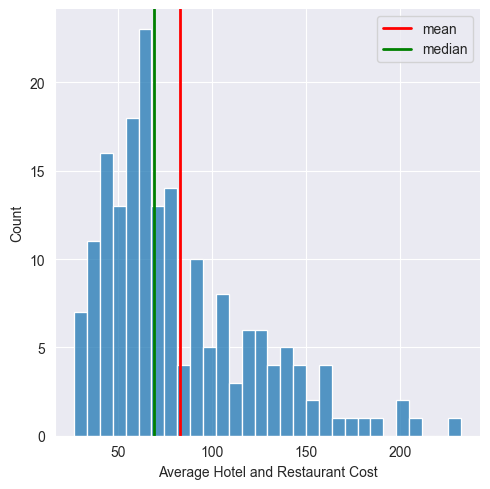

In [589]:
# Check out distribution plot of the average cost
plt.figure(figsize=(10,5))

# set the histogram, mean and median
sns.displot(avg_rest_hot_p, x="Average Hotel and Restaurant Cost", fill=True, bins=30)
plt.axvline(x=avg_rest_hot_p["Average Hotel and Restaurant Cost"].mean(), lw=2, color='red', label="mean")
plt.axvline(x=avg_rest_hot_p["Average Hotel and Restaurant Cost"].median(), lw=2, color='green',label="median")

plt.legend(["mean", "median"])
plt.savefig('distribution_avg_cost.png')

In [590]:
# Set a new column that classifies countries into budget travel, comfortable travel and luxury travel
# criteria was chosen based on the numerical summary
conditions = [avg_rest_hot_p.index <= 90, (avg_rest_hot_p.index > 90) & (avg_rest_hot_p.index <= 160), avg_rest_hot_p.index > 160]
choices = ["Budget Traveler", "Comfort traveler", "Luxury Traveler"]
avg_rest_hot_p["Type Traveler"] = np.select(conditions, choices, default = "Non Applicable")

In [591]:
# check the count of the categories
avg_rest_hot_p['Type Traveler'].value_counts()

Budget Traveler     84
Comfort traveler    56
Luxury Traveler     44
Name: Type Traveler, dtype: int64

#### LGBTQ Dataset

In [592]:
lgbtq.head()

,RANK,COUNTRY,GAI
0,1,Iceland,9.78
1,2,Netherlands,9.46
2,3,Norway,9.38
3,4,Sweden,9.18
4,5,Canada,9.02


In [593]:
lgbtq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RANK     175 non-null    int64  
 1   COUNTRY  175 non-null    object 
 2   GAI      175 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.2+ KB


In [594]:
# Capitalise the first letter of each word in the Country column, and remove any extra spaces
lgbtq['COUNTRY'] = lgbtq['COUNTRY'].str.title()
lgbtq['COUNTRY'] = lgbtq['COUNTRY'].str.strip()

#### Cuisine Rank Dataset

In [595]:
cuisine_rank.head()

,Country,Ratings
0,italy,4.72
1,greece,4.69
2,spain,4.59
3,japan,4.59
4,india,4.54


In [596]:
cuisine_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  95 non-null     object 
 1   Ratings  95 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [597]:
# replace unnecessary hyphens in country names
cuisine_rank['Country'] = cuisine_rank['Country'].str.replace('-', ' ')
# Capitalise the first letter of each word in the Country column, and remove any extra spaces
cuisine_rank['Country'] = cuisine_rank['Country'].str.title()
cuisine_rank['Country'] = cuisine_rank['Country'].str.strip()

## Adding ISO Code to All Datasets by Joining with Country Dataset


We will join all datasets with country data, so that all dataset can have ISO Code.Later in Tableau, we will connect datasets using ISO Code.Furthermore, we are analyzing countries that are included in WEF_TTDI index data, so all the other countries will be dropped.

As WEF dataset already contains ISO code and we are using countris based on WEF dataset,there is no need for joining with country datset."

#### Check climate - country

In [598]:
# left join by country dataset based on country names
clim = clim.merge(country[['Name','Iso3']], how='left', left_on='Country', right_on='Name')
clim.head()

,Country,Climate,Climate Zone,Name,Iso3
0,Afghanistan,Arid To Semiarid; Cold Winters And Hot Summers,Tropical,Afghanistan,AFG
1,Akrotiri,"Temperate; Mediterranean With Hot, Dry Summers...",Temperate,NaN,NaN
2,Albania,"Mild Temperate; Cool, Cloudy, Wet Winters; Hot...",Temperate,Albania,ALB
3,Algeria,"Arid To Semiarid; Mild, Wet Winters With Hot, ...",Tropical,Algeria,DZA
4,American Samoa,"Tropical Marine, Moderated By Southeast Trade ...",Tropical,American Samoa,ASM


In [599]:
# check the countries that are not merged
clim[clim['Name'].isnull()]

,Country,Climate,Climate Zone,Name,Iso3
1,Akrotiri,"Temperate; Mediterranean With Hot, Dry Summers...",Temperate,NaN,NaN
7,Anguilla,Tropical; Moderated By Northeast Trade Winds,Tropical,NaN,NaN
8,Antarctica,"Severe Low Temperatures Vary With Latitude, El...",Polar,NaN,NaN
10,Arctic Ocean,Polar Climate Characterized By Persistent Cold...,Polar,NaN,NaN
14,Ashmore And Cartier Islands,Tropical,Tropical,NaN,NaN
...,...,...,...,...,...
269,Virgin Islands,"Subtropical, Tempered By Easterly Trade Winds,...",Subtropical,NaN,NaN
270,Wake Island,Tropical,Tropical,NaN,NaN
271,Wallis And Futuna,"Tropical; Hot, Rainy Season (November To April...",Tropical,NaN,NaN
272,West Bank,Temperate; Temperature And Precipitation Vary ...,Temperate,NaN,NaN


In [600]:
# drop the countries that are not merged
clim = clim.dropna(subset=['Name'])
# drop the merged country name column to avoid repetition
clim = clim.drop(['Name'], axis=1)

In [601]:
clim.head()

,Country,Climate,Climate Zone,Iso3
0,Afghanistan,Arid To Semiarid; Cold Winters And Hot Summers,Tropical,AFG
2,Albania,"Mild Temperate; Cool, Cloudy, Wet Winters; Hot...",Temperate,ALB
3,Algeria,"Arid To Semiarid; Mild, Wet Winters With Hot, ...",Tropical,DZA
4,American Samoa,"Tropical Marine, Moderated By Southeast Trade ...",Tropical,ASM
5,Andorra,"Temperate; Snowy, Cold Winters And Warm, Dry S...",Temperate,ADO


#### Check Currency - Country

In [602]:
# left join by country dataset based on country names
curr = curr.merge(country[['Name','Iso3']], how='left', left_on='Country', right_on='Name')
curr.head()

,Country,Currency,Currency Code,Name,Iso3
0,Afghanistan,Afghani,AFN,Afghanistan,AFG
1,Åland Islands,Euro,EUR,NaN,NaN
2,Albania,Lek,ALL,Albania,ALB
3,Algeria,Algerian Dinar,DZD,Algeria,DZA
4,American Samoa,Us Dollar,USD,American Samoa,ASM


In [603]:
# check countries that were not merged
curr[curr['Name'].isnull()]

,Country,Currency,Currency Code,Name,Iso3
1,Åland Islands,Euro,EUR,NaN,NaN
7,Anguilla,East Caribbean Dollar,XCD,NaN,NaN
26,"Bonaire, Sint Eustatius And Saba",Us Dollar,USD,NaN,NaN
29,Bouvet Island,Norwegian Krone,NOK,NaN,NaN
31,British Indian Ocean Territory,Us Dollar,USD,NaN,NaN
45,Christmas Island,Australian Dollar,AUD,NaN,NaN
46,Cocos Keeling Islands,Australian Dollar,AUD,NaN,NaN
51,Cook Islands,New Zealand Dollar,NZD,NaN,NaN
56,Curaçao,Netherlands Antillean Guilder,ANG,NaN,NaN
69,Eswatini,Lilangeni,SZL,NaN,NaN


In [604]:
# drop countries that were not merged
curr = curr.dropna(subset= ['Name'])
# drop the second country name column
curr = curr.drop(['Name'], axis=1)

#### Check language - country

In [605]:
# left join by country dataset based on country names
lang = lang.merge(country[['Name','Iso3']], how='left', left_on='Country', right_on='Name')
lang.head()

,Country,Official Language,Name,Iso3
0,Afghanistan,"Dari Persian, Pashtu",Afghanistan,AFG
1,Albania,Albanian,Albania,ALB
2,Algeria,Arabic,Algeria,DZA
3,Andorra,Catalã¡N,Andorra,ADO
4,Angola,Portuguese,Angola,AGO


In [606]:
# check countries that were not merged
lang[lang['Name'].isnull()]

,Country,Official Language,Name,Iso3
50,East Timor,"Tetum, Portuguese",NaN,NaN
114,Micronesia,English,NaN,NaN
123,Nauru,Nauruan,NaN,NaN
134,Palestinian State (Proposed),Arabic,NaN,NaN
151,Sã£O Tomã© E Princã­Pe,Portuguese,NaN,NaN
191,Vatican City (Holy See),Italian,NaN,NaN
194,Western Sahara (Proposed State),Hassaniya Arabic,NaN,NaN


In [607]:
# drop countreis that were not merged
lang = lang.dropna(subset=['Name'])
# drop the second country name column
lang = lang.drop(['Name'], axis=1)

#### Check peace - country

In [608]:
# left join by country dataset based on country names
peace=peace.merge(country[['Name','Iso3']], how='left', left_on='Country', right_on='Name')
peace.head()

,Rank,Country,Name,Iso3
0,1,Iceland,Iceland,ISL
1,2,New Zealand,New Zealand,NZL
2,3,Denmark,Denmark,DNK
3,4,Portugal,Portugal,PRT
4,5,Slovenia,Slovenia,SVN


In [609]:
# check countries that were not merged
peace[peace['Name'].isnull()]

,Rank,Country,Name,Iso3
52,53,The Gambia,NaN,NaN
68,69,Eswatini,NaN,NaN
137,138,Palestine,NaN,NaN
154,155,Central African\nRepublic,NaN,NaN


In [610]:
# drop countries that were not merged
peace=peace.dropna(subset=['Name'])
# drop the second country name column
peace = peace.drop(['Name'], axis=1)

#### Check population - country

In [611]:
# left join by country dataset based on country code
pop=pop.merge(country[['Name', 'Iso3']], how='left', left_on='Country', right_on='Name')
pop.head()

,Country,Country Code,Pop_2021,Name,Iso3
0,Aruba,ABW,107195.0,Aruba,ABW
1,Africa Eastern And Southern,AFE,694665117.0,NaN,NaN
2,Afghanistan,AFG,39835428.0,Afghanistan,AFG
3,Africa Western And Central,AFW,470898870.0,NaN,NaN
4,Angola,AGO,33933611.0,Angola,AGO


In [612]:
# check countries that were not merged
pop[pop['Iso3'].isnull()]

,Country,Country Code,Pop_2021,Name,Iso3
1,Africa Eastern And Southern,AFE,6.946651e+08,NaN,NaN
3,Africa Western And Central,AFW,4.708989e+08,NaN,NaN
7,Arab World,ARB,4.445178e+08,NaN,NaN
36,Central Europe And The Baltics,CEB,1.016696e+08,NaN,NaN
49,Caribbean Small States,CSS,7.481631e+06,NaN,NaN
61,East Asia & Pacific (Excluding High Income),EAP,2.122086e+09,NaN,NaN
62,Early-Demographic Dividend,EAR,3.373867e+09,NaN,NaN
63,East Asia & Pacific,EAS,2.368623e+09,NaN,NaN
64,Europe & Central Asia (Excluding High Income),ECA,4.018289e+08,NaN,NaN
65,Europe & Central Asia,ECS,9.237537e+08,NaN,NaN


In [613]:
# drop countries that cannot be merged
pop = pop.dropna(subset=['Iso3'])
# drop both country iso code from the merged dataset, as population data already contains ISO code
pop = pop.drop(['Name', 'Iso3'], axis=1)

#### Check Religion - country

In [614]:
# left join by country dataset based on country names
rel=rel.merge(country[['Name','Iso3']], how='left', left_on='Country', right_on='Name')
rel.head()

,Country,Main Religion,Name,Iso3
0,Albania,Muslim,Albania,ALB
1,Anguilla,Anglican,NaN,NaN
2,Antigua And Barbuda,Anglican,Antigua And Barbuda,ATG
3,Armenia,Armenian Apostolic,Armenia,ARM
4,Aruba,Roman Catholic,Aruba,ABW


In [615]:
# check countries that were not merged
rel[rel['Name'].isnull()]

,Country,Main Religion,Name,Iso3
1,Anguilla,Anglican,NaN,NaN
15,British Virgin Islands,Methodist,NaN,NaN
24,Cook Islands,Christian,NaN,NaN
32,Falkland Islands (Malvinas),Christian,NaN,NaN
38,Gibraltar,Roman Catholic,NaN,NaN
61,Micronesia (Federated States Of),Roman Catholic,NaN,NaN
64,Montserrat,Anglican,NaN,NaN
71,Niue,Ekalesia Niue,NaN,NaN
72,Norfolk Island,Church Of England,NaN,NaN
86,Saint Helena Ex. Dep.,Church Of England,NaN,NaN


In [616]:
# drop countries that were not merged
rel = rel.dropna(subset=['Name'])
# drop the second country name column
rel = rel.drop(['Name'], axis=1)

#### Check Average Restaurant and Accomodation Cost - ISO

In [617]:
# left join by country dataset based on country codes
avg_rest_hot_p = avg_rest_hot_p.merge(country[['Name', 'Iso3']], how='left', left_on='Country', right_on='Name')
avg_rest_hot_p

,Country,Country Code,Average Hotel and Restaurant Cost,Type Traveler,Name,Iso3
0,Albania,ALB,50.78,Budget Traveler,Albania,ALB
1,Algeria,DZA,33.93,Budget Traveler,Algeria,DZA
2,Angola,AGO,79.22,Budget Traveler,Angola,AGO
3,Anguilla,AIA,122.30,Budget Traveler,NaN,NaN
4,Antigua And Barbuda,ATG,105.93,Budget Traveler,Antigua And Barbuda,ATG
...,...,...,...,...,...,...
179,"Virgin Islands, British",VGB,116.88,Luxury Traveler,NaN,NaN
180,West Bank And Gaza,PSE,96.53,Luxury Traveler,West Bank And Gaza,WBG
181,World,WLD,100.00,Luxury Traveler,NaN,NaN
182,Zambia,ZMB,47.62,Luxury Traveler,Zambia,ZMB


In [618]:
# check countries that were not merged
avg_rest_hot_p [avg_rest_hot_p ['Iso3'].isnull()]

,Country,Country Code,Average Hotel and Restaurant Cost,Type Traveler,Name,Iso3
3,Anguilla,AIA,122.30,Budget Traveler,NaN,NaN
22,Bonaire,BON,156.57,Budget Traveler,NaN,NaN
46,Curaçao,CUW,124.81,Budget Traveler,NaN,NaN
53,East Asia & Pacific (Icp),EAB,80.57,Budget Traveler,NaN,NaN
59,Eswatini,SWZ,66.54,Budget Traveler,NaN,NaN
61,Europe & Central Asia (Icp),ECB,120.78,Budget Traveler,NaN,NaN
96,Latin America & Caribbean (Icp),LCB,78.35,Comfort traveler,NaN,NaN
111,Middle East & North Africa (Icp),MEB,64.50,Comfort traveler,NaN,NaN
115,Montserrat,MSR,84.58,Comfort traveler,NaN,NaN
126,North America (Icp),NAB,128.94,Comfort traveler,NaN,NaN


In [619]:
# drop countries that were not merged
avg_rest_hot_p = avg_rest_hot_p.dropna(subset=['Iso3'])
# as the dataset contains both country name and country code, delete the merged columns
avg_rest_hot_p = avg_rest_hot_p.drop(['Name', 'Iso3'], axis=1)

In [620]:
avg_rest_hot_p

,Country,Country Code,Average Hotel and Restaurant Cost,Type Traveler
0,Albania,ALB,50.78,Budget Traveler
1,Algeria,DZA,33.93,Budget Traveler
2,Angola,AGO,79.22,Budget Traveler
4,Antigua And Barbuda,ATG,105.93,Budget Traveler
5,Argentina,ARG,89.24,Budget Traveler
...,...,...,...,...
177,Uruguay,URY,114.64,Luxury Traveler
178,Vietnam,VNM,35.01,Luxury Traveler
180,West Bank And Gaza,PSE,96.53,Luxury Traveler
182,Zambia,ZMB,47.62,Luxury Traveler


#### Cuisine - Country

In [621]:
# left join by country dataset based on country names
cuisine_temp = cuisine_rank.merge(country[['Name','Iso3']], how='left', left_on='Country', right_on='Name')
cuisine_temp.head()

,Country,Ratings,Name,Iso3
0,Italy,4.72,Italy,ITA
1,Greece,4.69,Greece,GRC
2,Spain,4.59,Spain,ESP
3,Japan,4.59,Japan,JPN
4,India,4.54,India,IND


In [622]:
# check countries that were not merged
cuisine_temp[cuisine_temp['Name'].isnull()]

,Country,Ratings,Name,Iso3
28,England,4.18,NaN,NaN
37,Bih,3.99,NaN,NaN
41,Palestine,3.98,NaN,NaN
68,Northern Ireland,3.91,NaN,NaN
79,Wales,3.88,NaN,NaN
87,Scotland,3.82,NaN,NaN


As the United Kingdom was divided to England, Northern Ireland, Wales and Scotland,
we will have one row for the United Kingdom with the average ratings of the 4 countries
as we have the United Kingdom in the WEF datset.

In [623]:
# add average of 4 nations in the United Kingdom to the existing row
uk_rank = cuisine_rank.iloc[[28,68,79,87]]['Ratings'].mean()
cuisine_rank.loc[len(cuisine_rank.index)] = ['United Kingdom', uk_rank]

In [624]:
# Then sort by ratings, and reset index
cuisine_rank.sort_values(by=['Ratings'], ignore_index=True, inplace=True, ascending=False)

In [625]:
# merge again with modified data
cuisine_rank = cuisine_rank.merge(country[['Name','Iso3']], how='left', left_on='Country', right_on='Name')
# check UK
cuisine_rank[cuisine_rank['Country']=='United Kingdom']

,Country,Ratings,Name,Iso3
49,United Kingdom,3.9475,United Kingdom,GBR


In [626]:
# drop countries that were not merged
cuisine_rank = cuisine_rank.dropna(subset=['Name'])
# drop the secondcountry name column
cuisine_rank = cuisine_rank.drop(['Name'], axis=1)

#### LGBT data - Country

In [627]:
# left join by country dataset based on country names
lgbtq = lgbtq.merge(country[['Name', 'Iso3']], how='left', left_on='COUNTRY', right_on='Name')
lgbtq.head()

,RANK,COUNTRY,GAI,Name,Iso3
0,1,Iceland,9.78,Iceland,ISL
1,2,Netherlands,9.46,Netherlands,NLD
2,3,Norway,9.38,Norway,NOR
3,4,Sweden,9.18,Sweden,SWE
4,5,Canada,9.02,Canada,CAN


In [628]:
# check countries that were not merged
# lgbtq[lgbtq['Name'].isnull()]

In [629]:
# check countries that were not merged
lgbtq=lgbtq.dropna(subset=['Name'])
# drop the second country name column
lgbtq = lgbtq.drop(['Name'], axis=1)

## Export cleaned dataset

In [630]:
country.to_csv('../cleaned_data/country.csv', index=False)

pop.to_csv('../cleaned_data/population.csv', index=False)

clim.to_csv('../cleaned_data/climate.csv', index=False)

curr.to_csv('../cleaned_data/currencies.csv', index=False)

lang.to_csv('../cleaned_data/language.csv', index=False)

rel.to_csv('../cleaned_data/religion.csv', index=False)

peace.to_csv('../cleaned_data/peace_index.csv', index=False)

wef.to_csv('../cleaned_data/wef_ttdi.csv', index=False)

avg_rest_hot_p.to_csv("../cleaned_data/avg_rest_hot_p.csv", index=False)

lgbtq.to_csv("../cleaned_data/lgbtq.csv", index=False)

cuisine_rank.to_csv('../cleaned_data/cuisine_rank.csv', index=False)